<a href="https://colab.research.google.com/github/BazaiHassan/tesnorflow-DeepLearning/blob/main/tf_multi_classification_fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Check the shape of a single sample
print(f"The training sample shape:\n{train_data[0].shape}\n")
print(f"The training label shape:\n{train_labels[0].shape}\n")

The training sample shape:
(28, 28)

The training label shape:
()



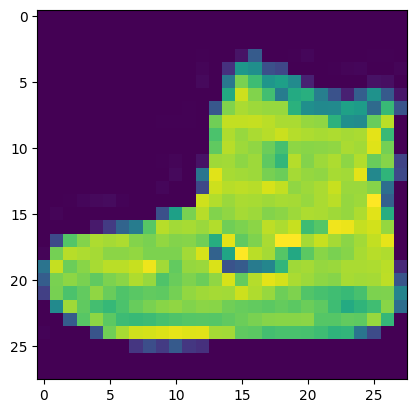

In [ ]:
# Visual a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [6]:
# Create list of classes based on the documentation of the dataset to be human-readable
class_names = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

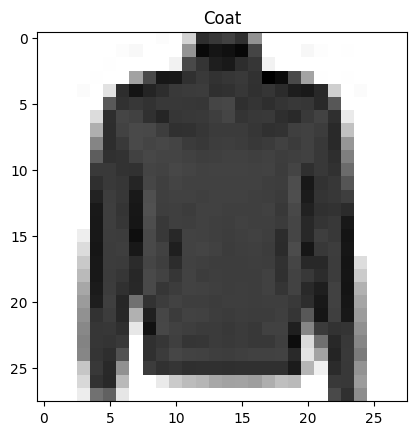

In [ ]:
# plot an random example of the dataset
import random

index_of_choice = random.randint(0, len(train_data))
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

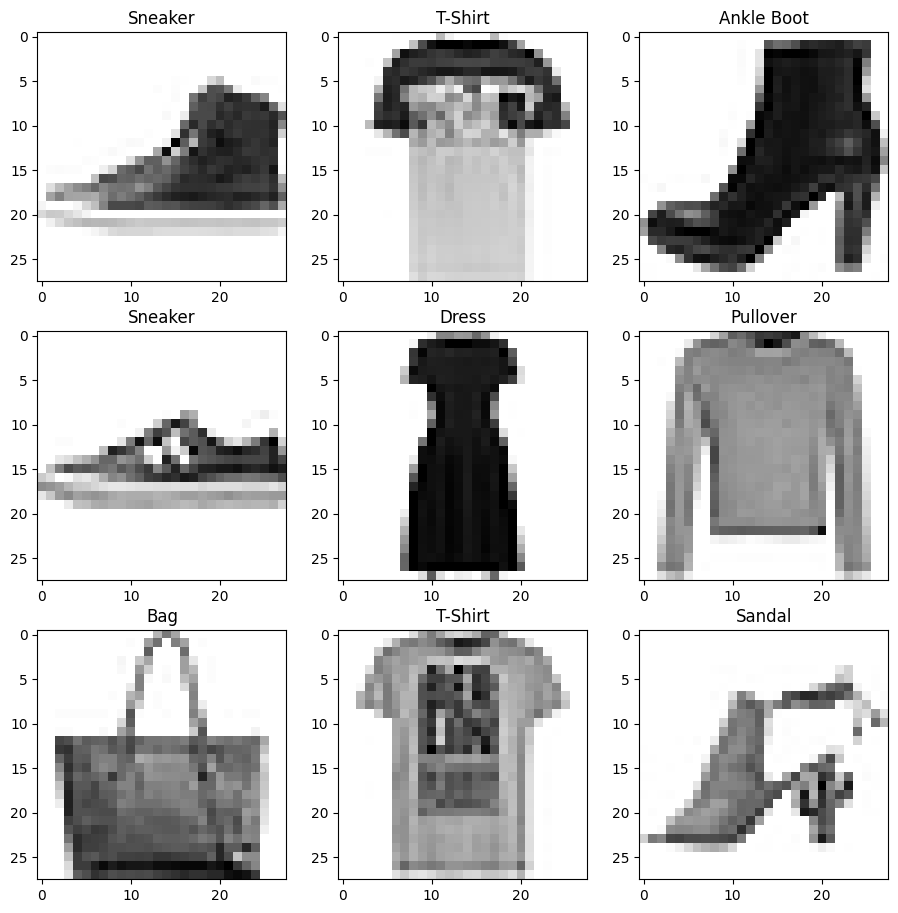

In [ ]:
# Plot multiple random examples of the dataset
import random
plt.figure(figsize=(11,11))
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  rand_index = random.randint(0, len(train_data))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  # plt.axis(False)


**SparseCategoricalCrossentropy** : When we use this that our labels are some int values.

**CategoricalCrossentropy** : To use this as the loss function it is important to convert labels to one-hot form

## **Case 1:** Without `one-hot` and without `Normalization`

In [ ]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
model_case_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
non_norm_non_hot_history = model_case_1.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8877 - accuracy: 0.2285 - val_loss: 1.6700 - val_accuracy: 0.2775
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6215 - accuracy: 0.2882 - val_loss: 1.5788 - val_accuracy: 0.2982
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5598 - accuracy: 0.3228 - val_loss: 1.5328 - val_accuracy: 0.3364
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5215 - accuracy: 0.3404 - val_loss: 1.5072 - val_accuracy: 0.3541
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4987 - accuracy: 0.3494 - val_loss: 1.4911 - val_accuracy: 0.3598
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4842 - accuracy: 0.3541 - val_loss: 1.4750 - val_accuracy: 0.3586
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4739 - accuracy: 0.3593 - val_loss: 1.4659 - val_accuracy:

In [ ]:
# Model Summary
model_case_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 4)                 3140      
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Case 2:** With `one-hot` and without `Normalization`

In [ ]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
# Compile the model (without one-hot and normalization)
model_case_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
non_norm_hot_history = model_case_2.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs = 10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4479 - accuracy: 0.1485 - val_loss: 1.8260 - val_accuracy: 0.2167
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7227 - accuracy: 0.2670 - val_loss: 1.6576 - val_accuracy: 0.3113
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.3095 - val_loss: 1.5667 - val_accuracy: 0.3293
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5452 - accuracy: 0.3319 - val_loss: 1.5251 - val_accuracy: 0.3454
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5177 - accuracy: 0.3406 - val_loss: 1.4982 - val_accuracy: 0.3615
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4976 - accuracy: 0.3497 - val_loss: 1.4835 - val_accuracy: 0.3661
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4834 - accuracy: 0.3535 - val_loss: 1.4743 - val_accuracy

In [ ]:
model_case_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 3140      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Case 3:** With `one-hot` and with `Normalization`

In [ ]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
# Normalizing
# Check the min and max value of training data

print(f"Min value of Training data: {train_data.min()}")
print(f"Max value of Training data: {train_data.max()}\n\n")

train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

print(f"Min value of Normalized Training data: {train_data_norm.min()}")
print(f"Max value of Normalized Training data: {test_data_norm.max()}")

Min value of Training data: 0
Max value of Training data: 255


Min value of Normalized Training data: 0.0
Max value of Normalized Training data: 1.0


In [ ]:
# Compile the model (without one-hot and normalization)
model_case_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
norm_hot_history = model_case_3.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs = 10,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0156 - accuracy: 0.6195 - val_loss: 0.7227 - val_accuracy: 0.7453
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6532 - accuracy: 0.7715 - val_loss: 0.6805 - val_accuracy: 0.7691
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6061 - accuracy: 0.7881 - val_loss: 0.6280 - val_accuracy: 0.7863
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5824 - accuracy: 0.7967 - val_loss: 0.6072 - val_accuracy: 0.7908
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5701 - accuracy: 0.7987 - val_loss: 0.6001 - val_accuracy: 0.7910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5594 - accuracy: 0.8028 - val_loss: 0.6358 - val_accuracy: 0.7815
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5523 - accuracy: 0.8038 - val_loss: 0.5901 - val_accuracy:

In [ ]:
model_case_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Case 4:** Without `one-hot` and with `Normalization`

In [ ]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
# Normalizing
# Check the min and max value of training data

print(f"Min value of Training data: {train_data.min()}")
print(f"Max value of Training data: {train_data.max()}\n\n")

train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

print(f"Min value of Normalized Training data: {train_data_norm.min()}")
print(f"Max value of Normalized Training data: {test_data_norm.max()}")

Min value of Training data: 0
Max value of Training data: 255


Min value of Normalized Training data: 0.0
Max value of Normalized Training data: 1.0


In [ ]:
# Compile the model
model_case_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
norm_non_hot_history = model_case_4.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1175 - accuracy: 0.5433 - val_loss: 0.7274 - val_accuracy: 0.7313
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6428 - accuracy: 0.7719 - val_loss: 0.6277 - val_accuracy: 0.7828
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5764 - accuracy: 0.8017 - val_loss: 0.5850 - val_accuracy: 0.7978
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5506 - accuracy: 0.8091 - val_loss: 0.5771 - val_accuracy: 0.7995
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5356 - accuracy: 0.8141 - val_loss: 0.5605 - val_accuracy: 0.8094
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5242 - accuracy: 0.8171 - val_loss: 0.5516 - val_accuracy: 0.8132
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5150 - accuracy: 0.8206 - val_loss: 0.5781 - val_accuracy:

In [ ]:
model_case_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compare all cases

<Axes: title={'center': 'Case 4: Normalized and Non one-hot'}>

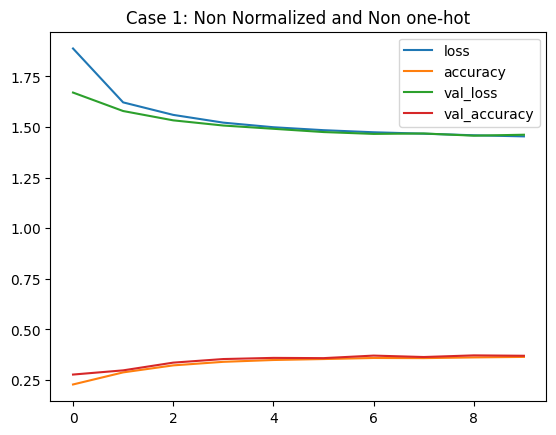

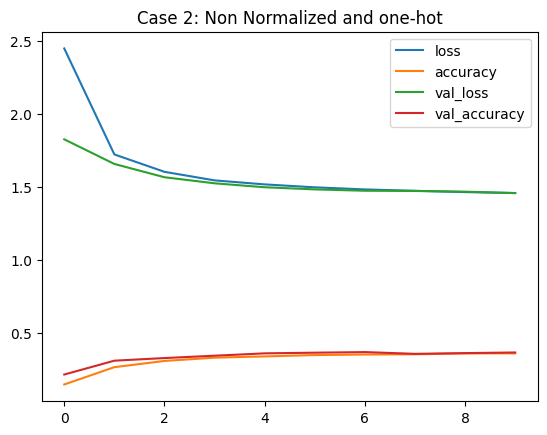

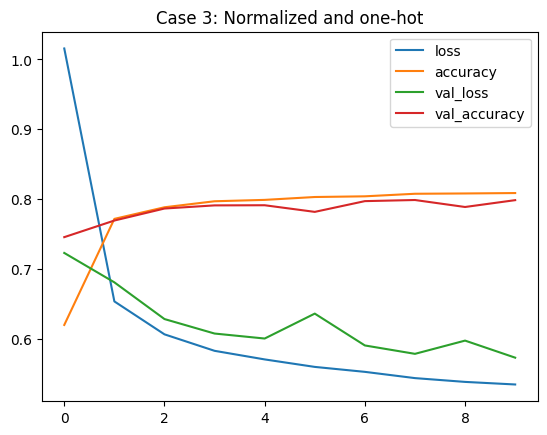

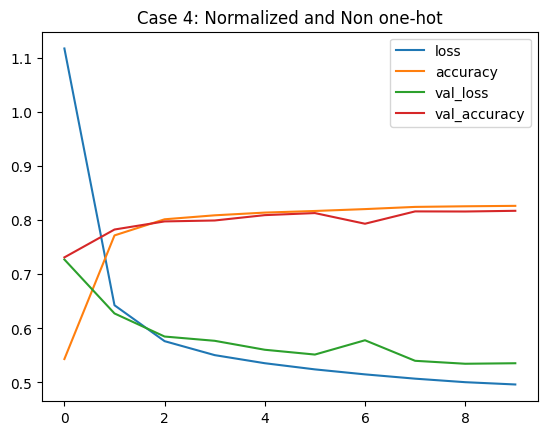

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_non_hot_history.history).plot(title="Case 1: Non Normalized and Non one-hot")
pd.DataFrame(non_norm_hot_history.history).plot(title="Case 2: Non Normalized and one-hot")
pd.DataFrame(norm_hot_history.history).plot(title="Case 3: Normalized and one-hot")
pd.DataFrame(norm_non_hot_history.history).plot(title="Case 4: Normalized and Non one-hot")



# Finding The Best Learning Rate In This Practice

## **Case 5:** Find best learning rate by using callbacks

In [ ]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
# Normalizing
# Check the min and max value of training data

print(f"Min value of Training data: {train_data.min()}")
print(f"Max value of Training data: {train_data.max()}\n\n")

train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

print(f"Min value of Normalized Training data: {train_data_norm.min()}")
print(f"Max value of Normalized Training data: {test_data_norm.max()}")

Min value of Training data: 0
Max value of Training data: 255


Min value of Normalized Training data: 0.0
Max value of Normalized Training data: 1.0


In [ ]:
# Compile the model
model_case_5.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [ ]:
# Fit the model
find_lr_history = model_case_5.fit(
    train_data_norm,
    train_labels,
    epochs = 40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0065 - accuracy: 0.6565 - val_loss: 0.6809 - val_accuracy: 0.7729 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6133 - accuracy: 0.7947 - val_loss: 0.6182 - val_accuracy: 0.7929 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8083 - val_loss: 0.6034 - val_accuracy: 0.7925 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5418 - accuracy: 0.8156 - val_loss: 0.5668 - val_accuracy: 0.8054 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5280 - accuracy: 0.8174 - val_loss: 0.5637 - val_accuracy: 0.8005 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5174 - accuracy: 0.8217 - val_loss: 0.5911 - val_accuracy: 0.7941 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the best learning rate')

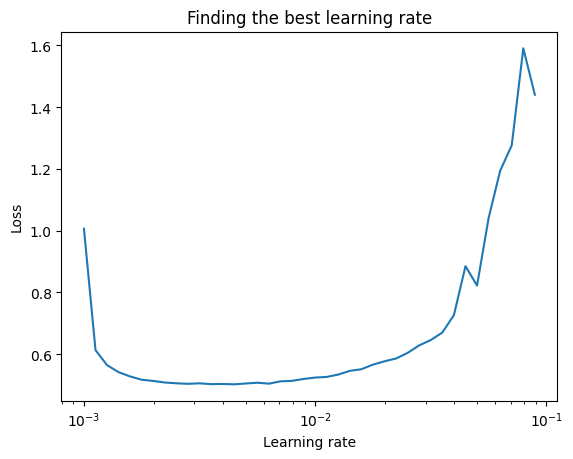

In [ ]:
import matplotlib.pyplot as plt
# 40 is the number of epochs, you can define this as a function if you want.
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

## **Case 6:** based on lr callback the best lr=0.001

In [7]:
# Build the model
tf.random.set_seed(42)
input_shape = train_data[0].shape # The input_shape is (28, 28)
output_shape = len(class_names)

model_case_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [8]:
# Normalizing
# Check the min and max value of training data

print(f"Min value of Training data: {train_data.min()}")
print(f"Max value of Training data: {train_data.max()}\n\n")

train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

print(f"Min value of Normalized Training data: {train_data_norm.min()}")
print(f"Max value of Normalized Training data: {test_data_norm.max()}")

Min value of Training data: 0
Max value of Training data: 255


Min value of Normalized Training data: 0.0
Max value of Normalized Training data: 1.0


In [9]:
# Compile the model
model_case_6.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

In [10]:
# Fit the model
find_lr_history = model_case_6.fit(
    train_data_norm,
    train_labels,
    epochs = 15,
    validation_data=(test_data_norm, test_labels),
)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6497 - accuracy: 0.3604 - val_loss: 1.0102 - val_accuracy: 0.6735
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7842 - accuracy: 0.7447 - val_loss: 0.7209 - val_accuracy: 0.7574
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6558 - accuracy: 0.7761 - val_loss: 0.6678 - val_accuracy: 0.7691
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6160 - accuracy: 0.7872 - val_loss: 0.6252 - val_accuracy: 0.7844
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5957 - accuracy: 0.7947 - val_loss: 0.6451 - val_accuracy: 0.7707
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5828 - accuracy: 0.7997 - val_loss: 0.6129 - val_accuracy: 0.7890
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5721 - accuracy: 0.8040 - val_loss: 0.6212 - val_accuracy:

## Evaluate our models

In [11]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [12]:
# Make some predictions
y_probs = model_case_6.predict(test_data_norm) # Prediction probabilities

313/313 [==============================] - 1s 2ms/step


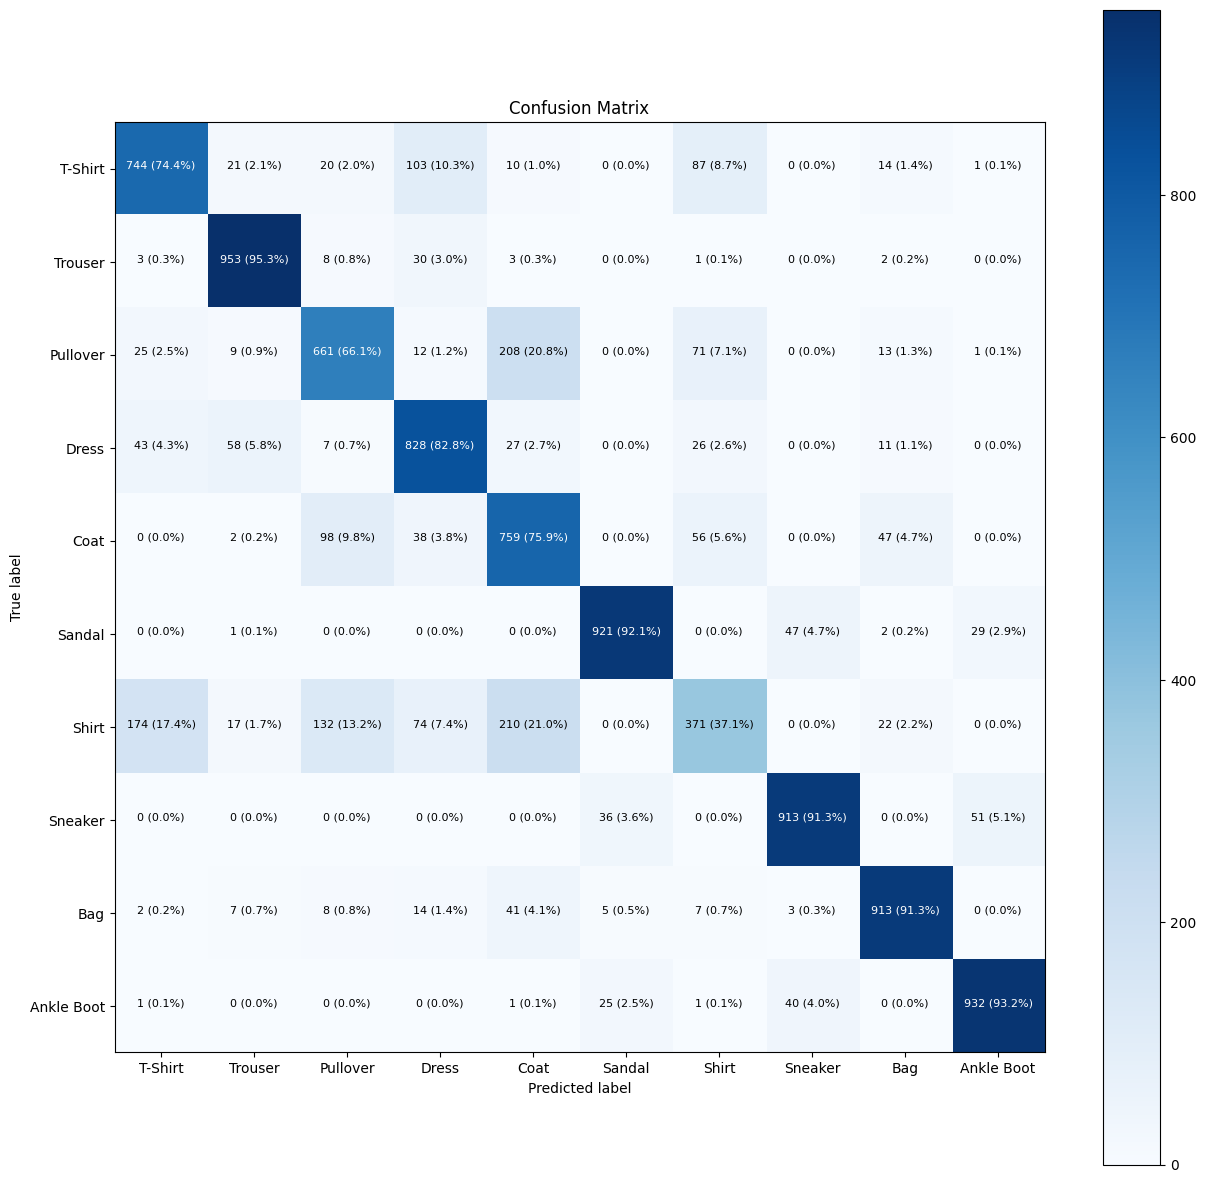

In [13]:
# Convert y_probs to integer to generate our confusion matrix plot
y_preds = y_probs.argmax(axis=1)

from sklearn.metrics import confusion_matrix
import numpy as np
confusion_matrix(y_true=test_labels, y_pred=y_preds)

make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize=(15,15),
    text_size=8
)


Random Sample = 8635
The probability of predicting Trouser for this sample is: 0.9613419771194458


Text(0.5, 1.0, 'Trouser')

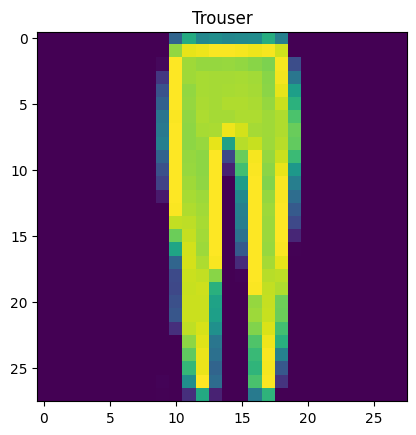

In [14]:
import random
random_sample = random.randint(0, len(test_data_norm))
print(f"Random Sample = {random_sample}")
print(f"The probability of predicting {class_names[tf.argmax(y_probs[random_sample])]} for this sample is: {y_probs[random_sample].max()}")

# Showing the selected sample
plt.imshow(test_data_norm[random_sample])
plt.title(class_names[tf.argmax(y_probs[random_sample])])

In [15]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 21ms/step


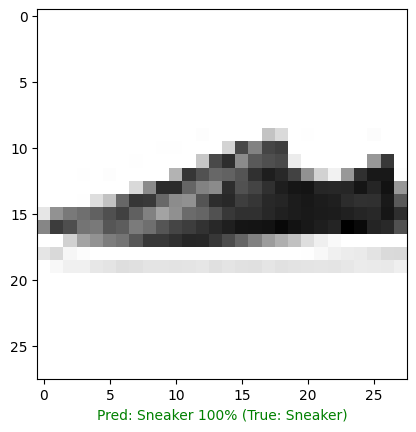

In [24]:
# Check out a random image as well as its prediction
plot_random_image(model=model_case_6,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

#Learning patterns of our model:

In [25]:
# See the layers
model_case_6.layers

In [27]:
model_case_6.layers[1]

In [29]:
# Get the pattern of the layer
weights, biases = model_case_6.layers[1].get_weights()

# See weights of one layer
weights, weights.shape

(array([[-0.04525841, -0.51976514,  0.03617971,  0.6473677 ],
        [-0.54549843, -0.12020303, -0.00349741,  0.7991465 ],
        [-0.22099051,  0.14127702,  0.281169  ,  0.6594908 ],
        ...,
        [ 0.28529382, -0.34390816, -0.2568874 , -0.02692839],
        [ 0.02585803, -0.36506966,  0.0703429 , -0.0956524 ],
        [-0.20801663,  0.00514894, -0.5146977 ,  0.4010178 ]],
       dtype=float32),
 (784, 4))

In [30]:
# See bias of one layer
biases, biases.shape

(array([1.0333174, 0.5013241, 2.0207846, 0.8191562], dtype=float32), (4,))

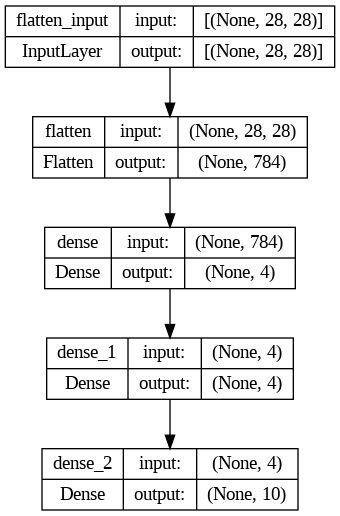

In [31]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_case_6, show_shapes=True)